In [1]:
# Martha Dunne
# C:\Users\mabdu\Practicum1a.ipynb
# anaconda Navigator
# jupyter notebook
# python 3.8
# pandas 0.25.1
# numpy 1.16.5
# matplotlib 3.1.1
# seaborn 0.9.0
# 
##### Practicum_Analysis.ipynb
#####   Step 2 
#####   Analysis of Step 1 file of clean, merged covid and mobility data
#####   Plots, Correlation
#####
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
# from datetime import datetime, timedelta
# from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from statistics import mode

## Read merged and cleaned file of two datasets
###     1 - Covid-19 John Hopkins dataset
###     2 - Google mobility data
### Merged data starts 2020-02-20, current day delayed several days due to mobility data processing

In [2]:
# Using the merged file from Practicum_Clean_Merge.ipynb
# Saved here for project delivery. 
# Can be rerun for current dates and information.
# Merge of two datasets
#  1- John hopkins dataset which updates daily
#  2- google cellphone mobility data which updates daily but is 3 to 4 days delayed due to processing
dfmrg = pd.read_csv("PracticumMergedData20200817.csv")
dfmrg.info()
# remove outliers, not applicable for this raw data per Prof
# locate null data - can result in bad data if ignored.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22797 entries, 0 to 22796
Data columns (total 14 columns):
country_region    22797 non-null object
date              22797 non-null object
cases             22797 non-null int64
deaths            22797 non-null int64
casesdelta        22797 non-null float64
deathsdelta       22797 non-null float64
casesdelta14      22797 non-null float64
deathsdelta14     22797 non-null float64
retailrec         22542 non-null float64
grocerrx          22498 non-null float64
transit           22609 non-null float64
work              22745 non-null float64
parks             22507 non-null float64
reside            22325 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 2.3+ MB


In [3]:
dfmrg[(dfmrg.country_region.str.contains('New Zealand',case=True))
      |(dfmrg.country_region.str.contains('Taiwan',case=True))
      |(dfmrg.country_region.str.contains('Australia',case=True))
      |(dfmrg.country_region.str.contains('Singapore',case=True))
      |(dfmrg.country_region.str.contains('Canada',case=True))
      |(dfmrg.country_region.str.contains('US',case=True))
      |(dfmrg.country_region.str.contains('Brazil',case=True))
      |(dfmrg.country_region.str.contains('India',case=True))
     ].isna().any()

country_region    False
date              False
cases             False
deaths            False
casesdelta        False
deathsdelta       False
casesdelta14      False
deathsdelta14     False
retailrec         False
grocerrx          False
transit           False
work              False
parks             False
reside            False
dtype: bool

##  Preliminary analysis; Statistics, histograms, scatterplots, correlation
### Best Country - Taiwan, New Zealand, Singapore, Canada 
### Worst Country - United States, Brazil, India

In [4]:
#count of cases delta for good and bad

In [5]:
# validation_date = save date to use for data validation for countries needing aggregation
#note for final project used static file from 20200817
validation_date = datetime.strftime(datetime.now() - timedelta(7), '%Y-%m-%d')
print('Save date for validation purposes is ', validation_date)

Save date for validation purposes is  2020-08-15


In [6]:
#Global daily and total cases and deaths
dfmrg[(dfmrg['date'] > validation_date)].sum()

country_region    0.0
date              0.0
cases             0.0
deaths            0.0
casesdelta        0.0
deathsdelta       0.0
casesdelta14      0.0
deathsdelta14     0.0
retailrec         0.0
grocerrx          0.0
transit           0.0
work              0.0
parks             0.0
reside            0.0
dtype: float64

In [7]:
# Countries of interest daily and total cases and deaths
# for covid data validation can compare US Covid numbers with external sources 
# taiwan atypical response. close borders. businesses open. strict quarantines and monitoring.
dfmrg[( (dfmrg.country_region.str.contains('New Zealand',case=True))
      |(dfmrg.country_region.str.contains('Taiwan',case=True))
      |(dfmrg.country_region.str.contains('Australia',case=True))
      |(dfmrg.country_region.str.contains('Singapore',case=True))
      |(dfmrg.country_region.str.contains('Canada',case=True))
      |(dfmrg.country_region.str.contains('US',case=True))
      |(dfmrg.country_region.str.contains('Brazil',case=True))
      |(dfmrg.country_region.str.contains('India',case=True))
      )
      & (dfmrg['date'] > validation_date)].sort_values(by='cases',ascending=True)

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside


In [8]:
# just to make commands easier to read
dfnz = dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)]
dfta = dfmrg[dfmrg.country_region.str.contains('Taiwan',case=True)]
dfau = dfmrg[dfmrg.country_region.str.contains('Australia',case=True)]
dfsi = dfmrg[dfmrg.country_region.str.contains('Singapore',case=True)]
dfca = dfmrg[dfmrg.country_region.str.contains('Canada',case=True)]
dfus = dfmrg[dfmrg.country_region.str.contains('US',case=True)]
dfbr = dfmrg[dfmrg.country_region.str.contains('Brazil',case=True)]
dfin = dfmrg[dfmrg.country_region.str.contains('India',case=True)]

## Statistics describe

In [9]:
# Central Tendency https://www.youtube.com/watch?v=PqXxjqMV0WY
#https://www.w3resource.com/pandas/dataframe/dataframe-mode.php
dfmrg.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,2.279700e+04,22797.000000,22797.000000,22797.000000,22797.000000,22797.000000,22542.000000,22498.000000,22609.000000,22745.000000,22507.000000,22325.000000
mean,4.865112e+04,2359.162609,894.449840,32.178795,750.990218,28.833224,-28.287242,-12.158325,-33.287983,-24.139283,-1.888435,11.344188
std,2.520482e+05,10911.421063,4574.817984,154.868701,4000.075391,145.691791,27.050150,21.621422,25.580542,23.200656,56.636481,10.329575
min,0.000000e+00,0.000000,-10034.000000,-1918.000000,-10034.000000,-1918.000000,-97.000000,-97.000000,-95.000000,-92.000000,-95.000000,-35.000000
25%,7.600000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,-49.000000,-23.000000,-53.000000,-40.000000,-34.000000,3.000000
50%,1.469000e+03,26.000000,22.000000,0.000000,12.000000,0.000000,-23.000000,-7.000000,-33.000000,-23.000000,-10.000000,10.000000
75%,1.593600e+04,343.000000,289.000000,5.000000,217.000000,4.000000,-5.000000,2.000000,-12.000000,-5.000000,8.000000,18.000000
max,5.313252e+06,168452.000000,77255.000000,4143.000000,77255.000000,3887.000000,60.000000,94.000000,48.000000,80.000000,517.000000,55.000000


In [10]:
dfnz.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,1122.379121,14.159341,8.840659,0.120879,8.598901,0.120879,-29.884615,-13.252747,-39.285714,-16.340659,-38.780220,10.906593
std,626.326212,9.829030,20.362784,0.477914,20.387099,0.477914,34.885652,17.220118,30.230893,29.972260,22.398847,11.234667
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-95.000000,-91.000000,-89.000000,-88.000000,-81.000000,-3.000000
25%,662.250000,1.000000,0.000000,0.000000,0.000000,0.000000,-70.000000,-22.500000,-68.000000,-38.500000,-52.000000,3.250000
50%,1498.500000,21.000000,1.000000,0.000000,1.000000,0.000000,-13.000000,-9.000000,-34.500000,-5.000000,-39.000000,7.000000
75%,1528.000000,22.000000,3.000000,0.000000,3.000000,0.000000,-4.000000,-4.000000,-24.250000,1.000000,-25.000000,18.000000
max,1609.000000,22.000000,89.000000,4.000000,89.000000,4.000000,8.000000,29.000000,18.000000,34.000000,7.000000,42.000000


In [11]:
dfta.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,351.016484,5.307692,2.543956,0.038462,2.549451,0.038462,-8.115385,4.043956,-16.115385,0.434066,-2.005495,2.434066
std,159.291542,2.397938,5.256487,0.265209,5.255387,0.265209,6.477576,5.412104,5.823641,13.460544,16.137701,2.613933
min,18.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,-28.000000,-12.000000,-34.000000,-60.000000,-47.000000,-4.000000
25%,323.750000,5.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,1.000000,-19.000000,-5.000000,-10.000000,1.000000
50%,440.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,4.000000,-15.000000,2.500000,-2.000000,2.000000
75%,447.000000,7.000000,2.000000,0.000000,2.000000,0.000000,-3.250000,8.000000,-12.000000,7.000000,4.750000,3.000000
max,481.000000,7.000000,27.000000,3.000000,27.000000,3.000000,8.000000,15.000000,2.000000,67.000000,65.000000,16.000000


In [12]:
dfau.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,7229.560440,89.351648,126.483516,2.082418,98.258242,1.142857,-20.362637,-1.269231,-38.054945,-18.208791,-18.219780,9.895604
std,5490.273766,77.431541,166.756471,3.932977,148.612233,2.149503,14.193234,10.206110,21.708192,16.739484,14.268384,6.312758
min,15.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-76.000000,-55.000000,-77.000000,-82.000000,-52.000000,-3.000000
25%,4634.750000,18.500000,10.000000,0.000000,7.000000,0.000000,-31.000000,-5.000000,-52.000000,-27.000000,-29.500000,6.000000
50%,7039.500000,98.000000,25.500000,0.000000,19.500000,0.000000,-18.500000,-2.000000,-44.000000,-19.000000,-18.000000,10.000000
75%,7898.500000,104.000000,218.500000,2.000000,127.250000,1.000000,-12.250000,3.000000,-36.000000,-12.250000,-8.250000,14.000000
max,23035.000000,379.000000,716.000000,21.000000,716.000000,13.000000,6.000000,35.000000,14.000000,17.000000,20.000000,33.000000


In [13]:
dfsi.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,24566.752747,16.082418,305.016484,0.148352,288.439560,0.148352,-37.516484,-9.989011,-42.307692,-34.615385,-35.324176,24.923077
std,20444.162048,10.885584,281.978908,0.400238,286.593431,0.400238,21.336485,9.671962,19.399375,23.523008,23.163349,12.972756
min,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70.000000,-35.000000,-75.000000,-83.000000,-73.000000,5.000000
25%,944.500000,3.000000,55.750000,0.000000,25.250000,0.000000,-61.000000,-17.000000,-63.000000,-51.750000,-58.000000,15.000000
50%,27123.500000,21.500000,237.500000,0.000000,216.500000,0.000000,-30.000000,-9.000000,-39.000000,-35.500000,-33.000000,25.000000
75%,43845.500000,26.000000,464.500000,0.000000,460.000000,0.000000,-19.000000,-4.000000,-30.000000,-13.000000,-15.000000,34.750000
max,55580.000000,27.000000,1426.000000,2.000000,1426.000000,2.000000,-8.000000,18.000000,-9.000000,3.000000,20.000000,55.000000


In [14]:
dfca.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000,182.000000,182.000000,182.000000,182.000000
mean,63308.153846,4735.659341,679.109890,49.824176,651.203297,49.373626,-25.340659,-5.28022,-43.659341,-34.587912,68.049451,11.945055
std,46123.899473,3795.731152,595.355559,61.244387,615.676762,61.581038,20.066035,13.49948,21.237785,21.778657,71.461095,8.006023
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.000000,-62.00000,-77.000000,-81.000000,-33.000000,-2.000000
25%,8785.250000,103.000000,242.750000,4.000000,148.000000,1.250000,-44.000000,-14.75000,-60.000000,-49.000000,6.000000,5.000000
50%,76582.500000,5739.500000,469.500000,16.500000,448.000000,16.500000,-21.500000,-2.00000,-47.000000,-41.000000,54.000000,11.000000
75%,106030.250000,8644.500000,1128.250000,91.500000,1128.250000,91.500000,-11.000000,4.00000,-36.250000,-9.500000,135.750000,17.000000
max,123605.000000,9068.000000,2778.000000,251.000000,2778.000000,251.000000,13.000000,35.00000,6.000000,7.000000,234.000000,33.000000


In [15]:
dfus.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,1.712345e+06,77080.318681,29193.620879,925.560440,25387.824176,852.521978,-19.895604,-3.252747,-30.214286,-30.071429,26.357143,10.302198
std,1.568828e+06,58372.515865,20982.732604,723.370162,21046.383953,754.149550,15.824489,8.461931,16.410925,17.085432,29.417342,6.674094
min,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-63.000000,-39.000000,-56.000000,-72.000000,-36.000000,-2.000000
25%,1.950942e+05,6035.000000,18209.250000,354.250000,3392.000000,63.750000,-32.000000,-7.000000,-43.000000,-41.000000,3.000000,4.000000
50%,1.461578e+06,91101.000000,25594.500000,848.500000,24477.000000,760.500000,-17.000000,-2.000000,-31.000000,-37.000000,27.000000,11.000000
75%,2.624978e+06,127501.250000,45179.500000,1336.000000,33094.250000,1275.250000,-13.000000,0.750000,-24.000000,-16.000000,53.000000,15.000000
max,5.313252e+06,168452.000000,77255.000000,2666.000000,77255.000000,2666.000000,13.000000,26.000000,7.000000,5.000000,86.000000,24.000000


In [16]:
dfbr.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,7.771464e+05,31298.945055,17997.362637,585.291209,14878.445055,514.082418,-39.642857,-3.846154,-35.351648,-18.906593,-38.291209,12.192308
std,9.848808e+05,34756.404625,18853.250957,496.071147,17483.635966,497.122625,20.484705,12.275316,20.226821,18.297331,19.802278,6.254399
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-76.000000,-38.000000,-69.000000,-72.000000,-75.000000,-2.000000
25%,5.996750e+03,210.750000,830.500000,36.000000,133.750000,2.250000,-54.000000,-12.000000,-49.000000,-30.750000,-49.000000,10.250000
50%,2.269010e+05,15312.000000,11805.000000,587.000000,6544.000000,443.000000,-43.000000,-2.000000,-39.000000,-20.000000,-43.000000,13.000000
75%,1.393580e+06,59274.000000,30901.250000,1084.250000,26325.500000,998.250000,-32.250000,5.000000,-30.000000,-7.000000,-33.000000,16.000000
max,3.275520e+06,106523.000000,69074.000000,1595.000000,69074.000000,1595.000000,9.000000,26.000000,13.000000,21.000000,69.000000,27.000000


In [17]:
dfin.describe()

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
count,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,4.234977e+05,10194.857143,13878.675824,269.428571,9619.351648,205.296703,-55.401099,-19.010989,-40.989011,-34.307692,-43.324176,16.390110
std,6.401648e+05,13685.303208,18934.838072,322.752086,14207.688759,276.583038,27.433266,22.025848,22.486826,21.639279,22.157133,9.278771
min,3.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-87.000000,-76.000000,-74.000000,-72.000000,-68.000000,-1.000000
25%,1.547250e+03,40.750000,176.750000,5.750000,23.250000,0.000000,-77.000000,-32.000000,-57.000000,-49.000000,-57.000000,13.250000
50%,8.821600e+04,2812.000000,4491.500000,131.500000,2624.000000,78.500000,-59.000000,-10.500000,-41.000000,-34.000000,-51.000000,16.000000
75%,5.808208e+05,17273.250000,19384.250000,440.000000,12643.000000,369.250000,-54.000000,-1.000000,-37.000000,-23.250000,-48.000000,22.750000
max,2.525922e+06,49036.000000,66999.000000,2003.000000,61242.000000,2003.000000,2.000000,9.000000,5.000000,8.000000,6.000000,32.000000


In [18]:
# Return Statistics Error
#The mode function will return the modal value only if the distribution has a unique mode. 
#If the distribution has multiple modes, python raises StatisticsError
#statistics.mode(dfnz)
#statistics.mode(dfta)
#statistics.mode(dfau)
#statistics.mode(dfsi)
#statistics.mode(dfca)
#statistics.mode(dfus)
#statistics.mode(dfbr)
#statistics.mode(dfin)
#statistics.mode(dfmrg)

# Seaborn pairplot scatter plots

In [19]:
dfnzS = dfnz
dfnzS = dfnz.drop(['country_region'], axis=1)
dfnzS = dfnzS.drop(['cases'], axis=1).drop(['deaths'], axis=1).drop(['deathsdelta'], axis=1)
dfnzS = dfnzS.drop(['casesdelta14'], axis=1).drop(['deathsdelta14'], axis=1)

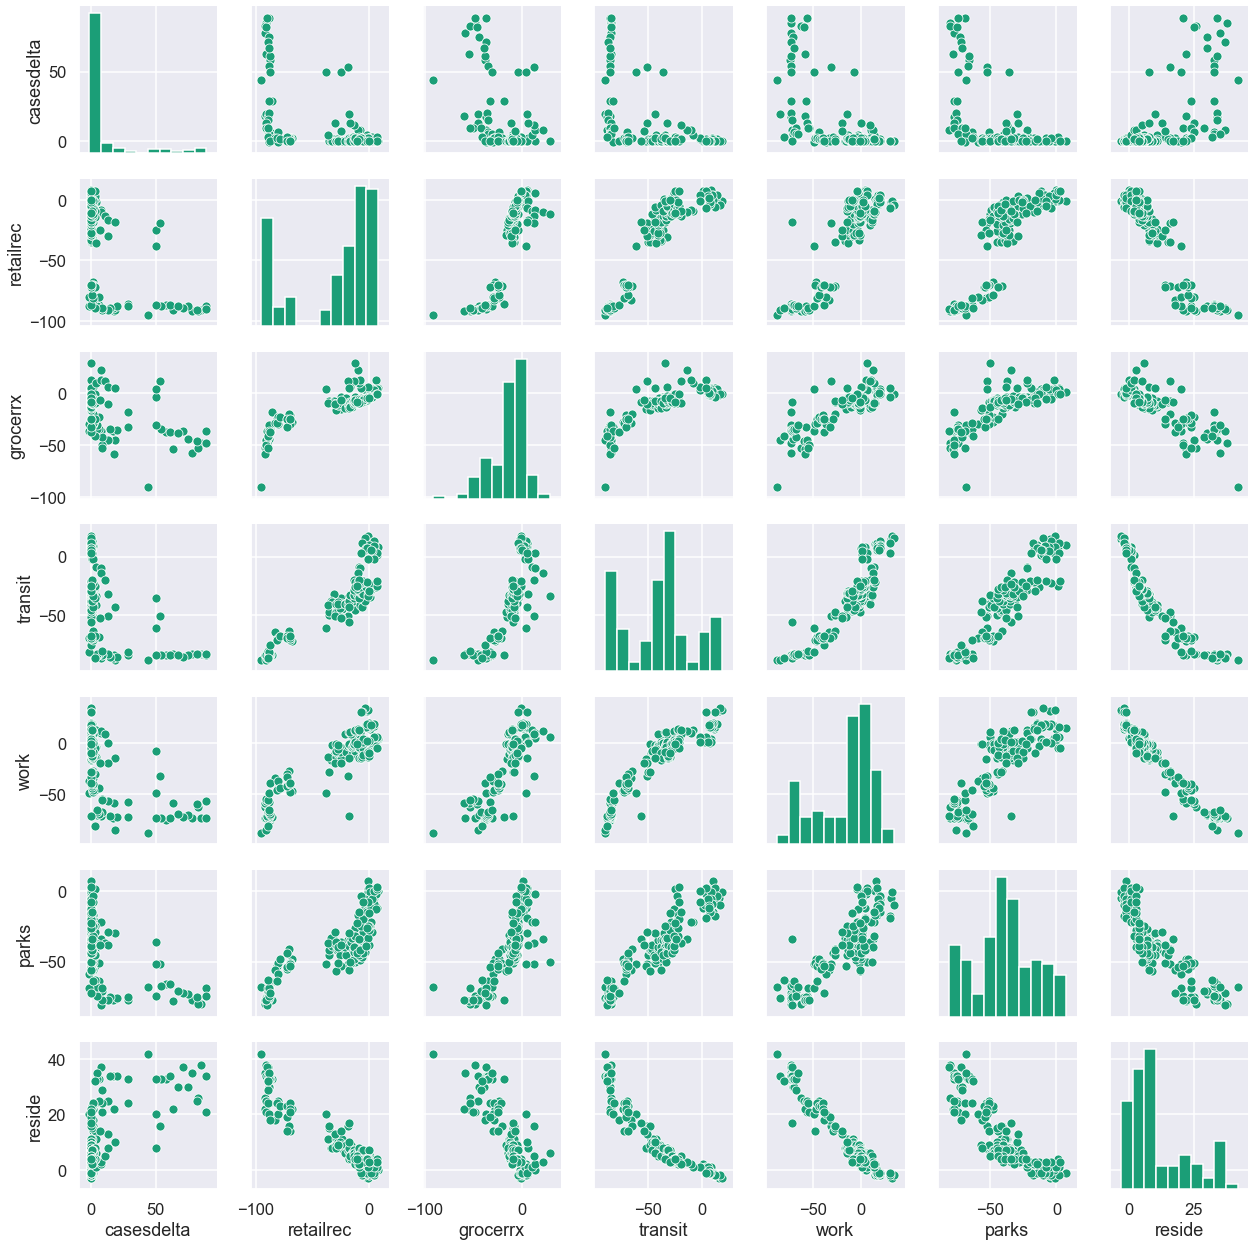

In [20]:
# https://pythonbasics.org/seaborn-pairplot/
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
sns.pairplot(dfnzS)

In [21]:
#Plot altogether is meaningless


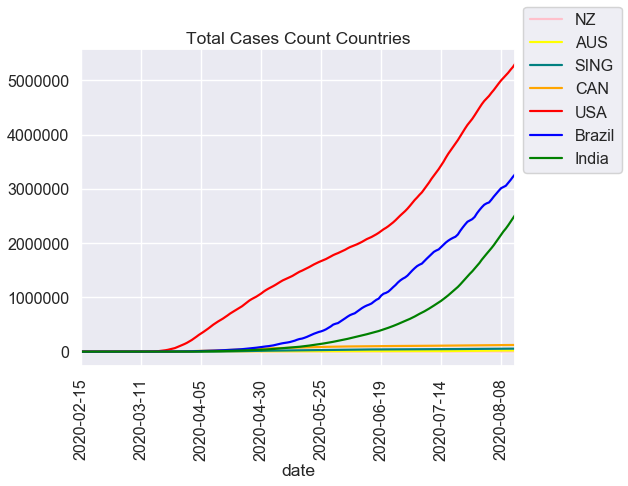

In [22]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Total Cases Count Countries')
dfnz.plot(kind='line',x='date',y='cases',label='NZ',color='pink',ax=ax)
dfau.plot(kind='line',x='date',y='cases',label='AUS',color='yellow',ax=ax)
dfsi.plot(kind='line',x='date',y='cases',label='SING',color='teal',ax=ax)
dfca.plot(kind='line',x='date',y='cases',label='CAN',color='orange',ax=ax)
dfus.plot(kind='line',x='date',y='cases',label='USA',color='red',ax=ax)
dfbr.plot(kind='line',x='date',y='cases',label='Brazil',color='blue',ax=ax)
dfin.plot(kind='line',x='date',y='cases',label='India',color='green',ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

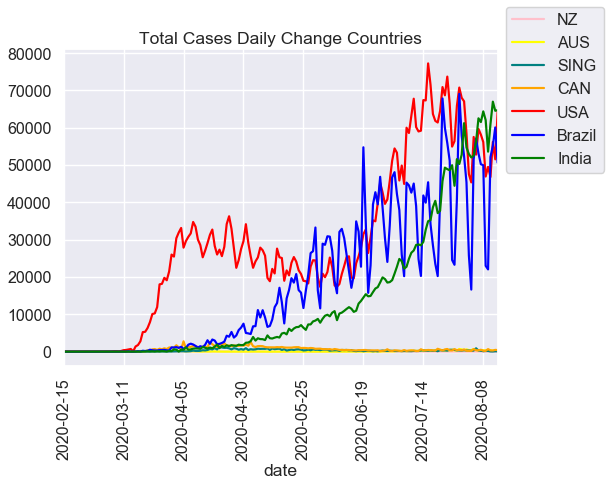

In [23]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Total Cases Daily Change Countries')
dfnz.plot(kind='line',x='date',y='casesdelta',label='NZ',color='pink',ax=ax)
dfau.plot(kind='line',x='date',y='casesdelta',label='AUS',color='yellow',ax=ax)
dfsi.plot(kind='line',x='date',y='casesdelta',label='SING',color='teal',ax=ax)
dfca.plot(kind='line',x='date',y='casesdelta',label='CAN',color='orange',ax=ax)
dfus.plot(kind='line',x='date',y='casesdelta',label='USA',color='red',ax=ax)
dfbr.plot(kind='line',x='date',y='casesdelta',label='Brazil',color='blue',ax=ax)
dfin.plot(kind='line',x='date',y='casesdelta',label='India',color='green',ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

## New Zealand, Australia, Singapore, Canada

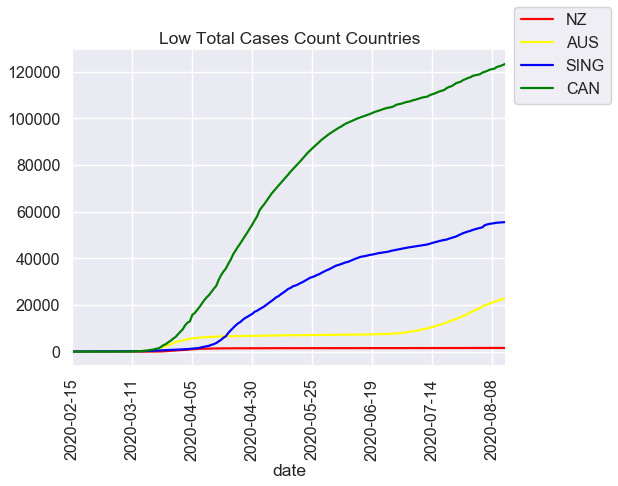

In [24]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Low Total Cases Count Countries')
dfnz.plot(kind='line',x='date',y='cases',label='NZ',color='red',ax=ax)
dfau.plot(kind='line',x='date',y='cases',label='AUS',color='yellow',ax=ax)
dfsi.plot(kind='line',x='date',y='cases',label='SING',color='blue',ax=ax)
dfca.plot(kind='line',x='date',y='cases',label='CAN',color='green',ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

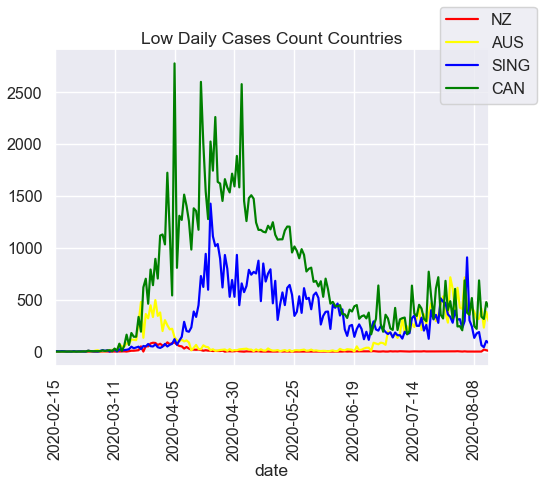

In [25]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Low Daily Cases Count Countries')
dfnz.plot(kind='line',x='date',y='casesdelta',label='NZ',color='red',ax=ax)
dfau.plot(kind='line',x='date',y='casesdelta',label='AUS',color='yellow',ax=ax)
dfsi.plot(kind='line',x='date',y='casesdelta',label='SING',color='blue',ax=ax)
dfca.plot(kind='line',x='date',y='casesdelta',label='CAN',color='green',ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

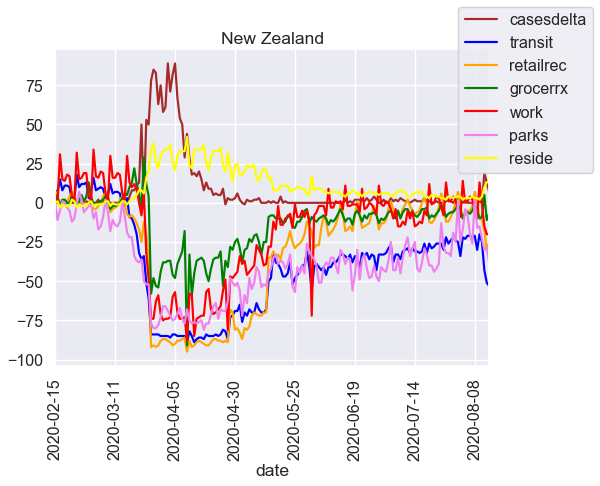

In [26]:
# Google Mobility residences recorded differently, parks multple variables,transit for urban areas?
# WORK HOLIDAYS
#   Easter Monday    Mon, Apr 13, 2020
#   Anzac Day        Mon, Apr 27, 2020
#   Queen's Birthday Mon, Jun 1, 2020
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('New Zealand')
dfnz.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfnz.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfnz.plot(kind='line',x='date',y='retailrec', color='orange', ax=ax)
dfnz.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfnz.plot(kind='line',x='date',y='work', color='red', ax=ax)
dfnz.plot(kind='line',x='date',y='parks', color='violet', ax=ax)
dfnz.plot(kind='line',x='date',y='reside', color='yellow', ax=ax)
plt.legend(bbox_to_anchor=(1.1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

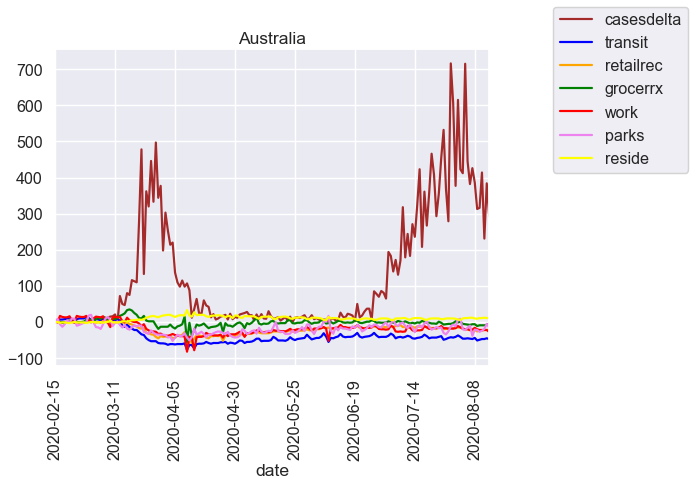

In [27]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Australia')
dfau.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfau.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfau.plot(kind='line',x='date',y='retailrec', color='orange', ax=ax)
dfau.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfau.plot(kind='line',x='date',y='work', color='red', ax=ax)
dfau.plot(kind='line',x='date',y='parks', color='violet', ax=ax)
dfau.plot(kind='line',x='date',y='reside', color='yellow', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

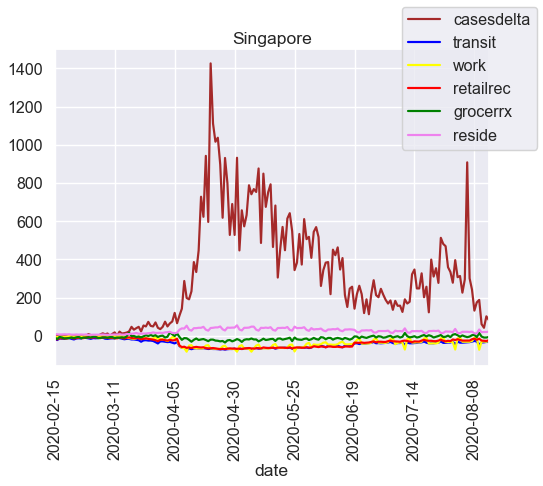

In [32]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Singapore')
dfsi.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfsi.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfsi.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfsi.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfsi.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfsi.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
#dfsi.plot(kind='line',x='date',y='parks', color='orange', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

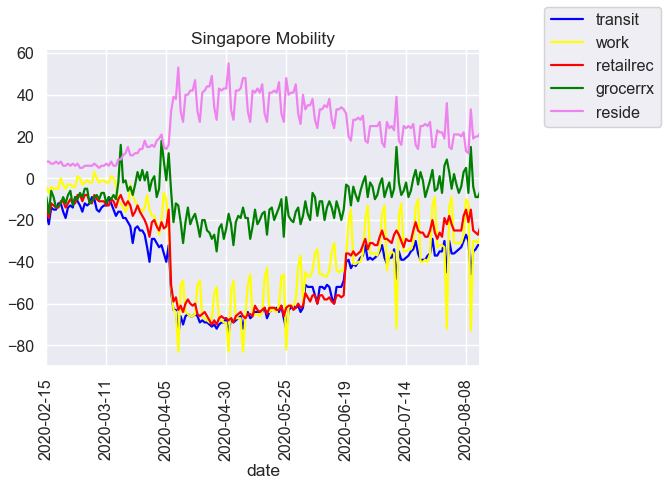

In [31]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Singapore Mobility')
#dfsi.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfsi.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfsi.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfsi.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfsi.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfsi.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
#dfsi.plot(kind='line',x='date',y='parks', color='orange', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

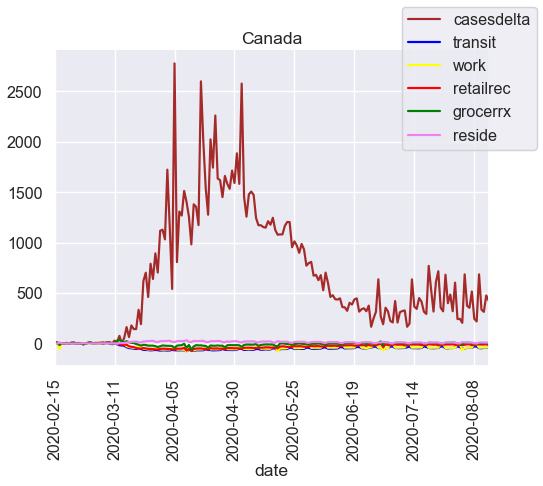

In [33]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Canada')
dfca.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfca.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfca.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfca.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfca.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfca.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

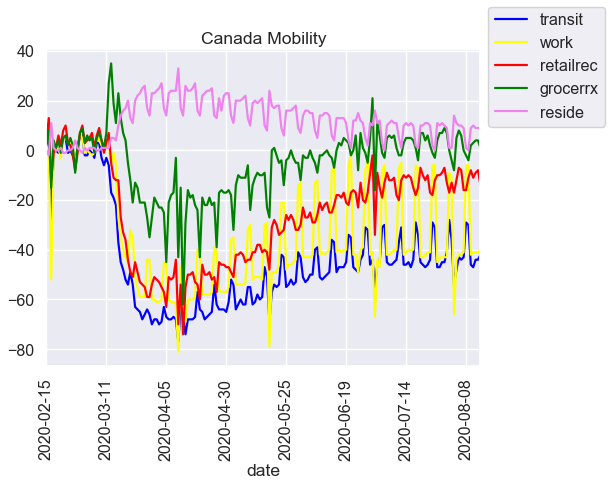

In [35]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Canada Mobility')
#dfca.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfca.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfca.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfca.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfca.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfca.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

## USA, Brazil, India

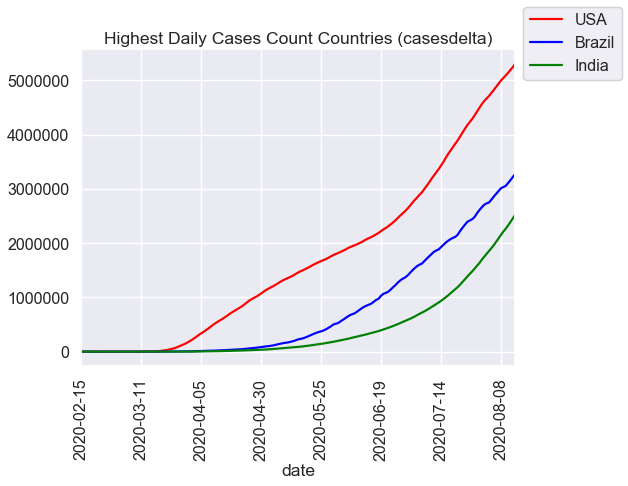

In [32]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Highest Daily Cases Count Countries (casesdelta)')
dfus.plot(kind='line',x='date',y='cases',label='USA',color='red',ax=ax)
dfbr.plot(kind='line',x='date',y='cases',label='Brazil',color='blue',ax=ax)
dfin.plot(kind='line',x='date',y='cases',label='India',color='green',ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

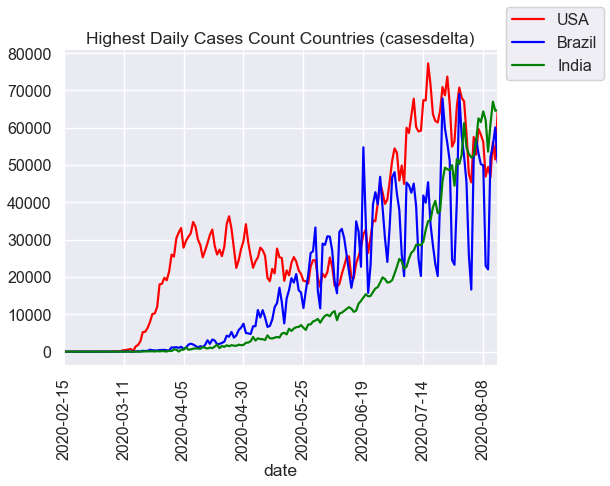

In [33]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Highest Daily Cases Count Countries (casesdelta)')
dfus.plot(kind='line',x='date',y='casesdelta',label='USA',color='red',ax=ax)
dfbr.plot(kind='line',x='date',y='casesdelta',label='Brazil',color='blue',ax=ax)
dfin.plot(kind='line',x='date',y='casesdelta',label='India',color='green',ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

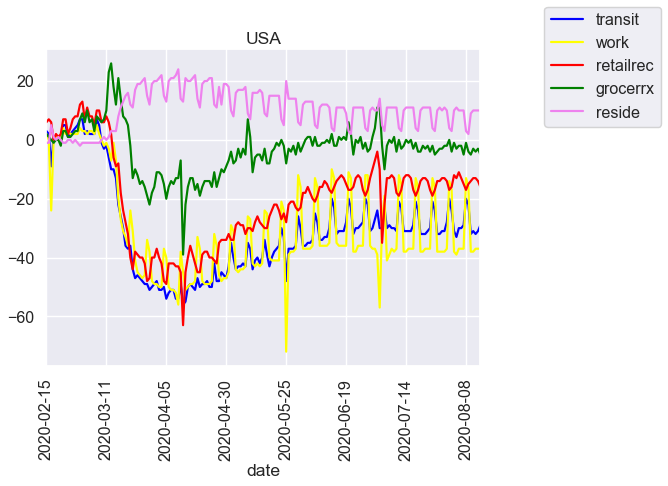

In [37]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('USA')
#dfus.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfus.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfus.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfus.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfus.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfus.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

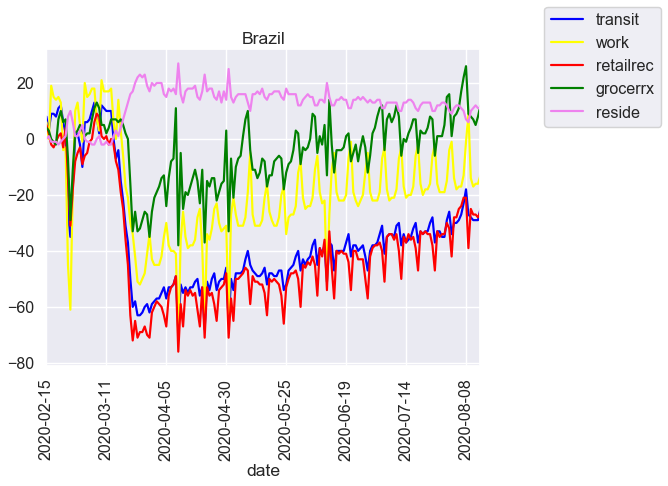

In [38]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Brazil')
#dfbr.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfbr.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfbr.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfbr.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfbr.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfbr.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

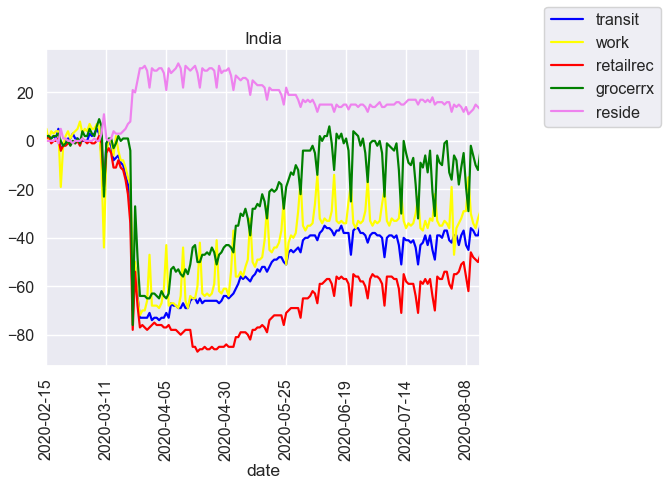

In [39]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('India')
#dfin.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfin.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfin.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfin.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfin.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfin.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

## Correlations (Pearson)

In [37]:
# New Zealand Strong GOOD Covid-19 response country
# see moderate strength negative correlation where casesdelta14 between 0.5 and 0.75
#        for retailrec, grocerrx, transit, work, parks
# consider dropping cases, deaths, deathsdelta, deathsdelta14, maybe cases delta for linear regression
# moderate strength positive correlation with reside
# Will train regression model with New Zealand.
#Pearson correlation assumes that your variables are normally distributed, that there is a straight line relationship between each of the variables and that the data is normally distributed about the regression line
dfnz.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.908345,-0.202229,0.100808,0.143246,0.142596,-0.200151,-0.312807,-0.507477,-0.270717,-0.411065,0.251897
deaths,0.908345,1.000000,-0.475436,-0.055873,-0.220855,0.127605,0.127815,0.013524,-0.186059,0.075745,-0.099962,-0.091274
casesdelta,-0.202229,-0.475436,1.000000,0.068413,0.297623,-0.070110,-0.571267,-0.555312,-0.525784,-0.615183,-0.536743,0.614441
deathsdelta,0.100808,-0.055873,0.068413,1.000000,0.471681,0.153376,-0.405455,-0.365498,-0.360879,-0.402097,-0.368937,0.428117
casesdelta14,0.143246,-0.220855,0.297623,0.471681,1.000000,0.071348,-0.655763,-0.625061,-0.590206,-0.673962,-0.590140,0.680643
deathsdelta14,0.142596,0.127605,-0.070110,0.153376,0.071348,1.000000,-0.335203,-0.215792,-0.272926,-0.275587,-0.204813,0.291261
retailrec,-0.200151,0.127815,-0.571267,-0.405455,-0.655763,-0.335203,1.000000,0.888261,0.900056,0.908362,0.853191,-0.939088
grocerrx,-0.312807,0.013524,-0.555312,-0.365498,-0.625061,-0.215792,0.888261,1.000000,0.837484,0.839535,0.797639,-0.846091
transit,-0.507477,-0.186059,-0.525784,-0.360879,-0.590206,-0.272926,0.900056,0.837484,1.000000,0.921899,0.928621,-0.924978
work,-0.270717,0.075745,-0.615183,-0.402097,-0.673962,-0.275587,0.908362,0.839535,0.921899,1.000000,0.830046,-0.968382


In [38]:
dfta.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.977816,-0.289749,-0.073513,0.013664,-0.006162,0.109983,0.394839,0.011139,-0.240978,-0.035024,-0.085774
deaths,0.977816,1.000000,-0.407837,-0.053462,-0.042424,-0.001337,0.162003,0.406360,0.084056,-0.250299,-0.023228,-0.099873
casesdelta,-0.289749,-0.407837,1.000000,0.147398,0.287515,0.028504,-0.220606,-0.103385,-0.273172,0.057784,-0.003416,0.181759
deathsdelta,-0.073513,-0.053462,0.147398,1.000000,0.111601,-0.021148,-0.081019,-0.055073,-0.054345,0.038632,-0.079986,0.063451
casesdelta14,0.013664,-0.042424,0.287515,0.111601,1.000000,0.147276,-0.265427,-0.204617,-0.471598,-0.157795,-0.028562,0.386333
deathsdelta14,-0.006162,-0.001337,0.028504,-0.021148,0.147276,1.000000,-0.045643,-0.043525,-0.254667,-0.109942,0.015540,0.167056
retailrec,0.109983,0.162003,-0.220606,-0.081019,-0.265427,-0.045643,1.000000,0.789067,0.663395,-0.465595,0.764984,-0.125587
grocerrx,0.394839,0.406360,-0.103385,-0.055073,-0.204617,-0.043525,0.789067,1.000000,0.479584,-0.359437,0.587098,-0.079073
transit,0.011139,0.084056,-0.273172,-0.054345,-0.471598,-0.254667,0.663395,0.479584,1.000000,0.025945,0.320385,-0.503716
work,-0.240978,-0.250299,0.057784,0.038632,-0.157795,-0.109942,-0.465595,-0.359437,0.025945,1.000000,-0.549036,-0.571768


In [39]:
dfau.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.966543,0.620674,0.748025,0.699535,0.596672,-0.239553,-0.359579,-0.511246,-0.368669,-0.136850,0.335597
deaths,0.966543,1.000000,0.486024,0.721153,0.632585,0.634076,-0.161195,-0.286723,-0.420534,-0.282485,-0.069649,0.249505
casesdelta,0.620674,0.486024,1.000000,0.658037,0.589381,0.306380,-0.079948,-0.130525,-0.236812,-0.114595,-0.039188,0.122722
deathsdelta,0.748025,0.721153,0.658037,1.000000,0.775076,0.656045,-0.153860,-0.259306,-0.234847,-0.151798,-0.122248,0.153224
casesdelta14,0.699535,0.632585,0.589381,0.775076,1.000000,0.636110,-0.345572,-0.417712,-0.385217,-0.372255,-0.284520,0.370499
deathsdelta14,0.596672,0.634076,0.306380,0.656045,0.636110,1.000000,-0.295466,-0.294148,-0.304598,-0.274016,-0.243960,0.296703
retailrec,-0.239553,-0.161195,-0.079948,-0.153860,-0.345572,-0.295466,1.000000,0.722799,0.876695,0.879751,0.797828,-0.915496
grocerrx,-0.359579,-0.286723,-0.130525,-0.259306,-0.417712,-0.294148,0.722799,1.000000,0.601703,0.691906,0.444958,-0.629941
transit,-0.511246,-0.420534,-0.236812,-0.234847,-0.385217,-0.304598,0.876695,0.601703,1.000000,0.926739,0.692752,-0.932876
work,-0.368669,-0.282485,-0.114595,-0.151798,-0.372255,-0.274016,0.879751,0.691906,0.926739,1.000000,0.599099,-0.950189


In [40]:
dfsi.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.959840,0.188276,-0.171213,0.424651,-0.047856,-0.139592,0.191288,-0.200415,-0.243360,-0.195252,0.259107
deaths,0.959840,1.000000,0.377630,-0.067495,0.579190,0.052974,-0.389501,0.012638,-0.443336,-0.453917,-0.439522,0.478995
casesdelta,0.188276,0.377630,1.000000,0.167449,0.578031,0.343242,-0.789021,-0.587188,-0.797668,-0.736568,-0.768893,0.744292
deathsdelta,-0.171213,-0.067495,0.167449,1.000000,0.143154,0.137768,-0.263997,-0.163126,-0.286542,-0.237891,-0.261764,0.255459
casesdelta14,0.424651,0.579190,0.578031,0.143154,1.000000,0.186311,-0.680153,-0.399633,-0.652438,-0.621634,-0.695903,0.639882
deathsdelta14,-0.047856,0.052974,0.343242,0.137768,0.186311,1.000000,-0.340339,-0.257322,-0.334929,-0.290118,-0.346984,0.310791
retailrec,-0.139592,-0.389501,-0.789021,-0.263997,-0.680153,-0.340339,1.000000,0.741457,0.967439,0.862726,0.954579,-0.887917
grocerrx,0.191288,0.012638,-0.587188,-0.163126,-0.399633,-0.257322,0.741457,1.000000,0.629710,0.479389,0.698999,-0.485717
transit,-0.200415,-0.443336,-0.797668,-0.286542,-0.652438,-0.334929,0.967439,0.629710,1.000000,0.913791,0.907070,-0.918427
work,-0.243360,-0.453917,-0.736568,-0.237891,-0.621634,-0.290118,0.862726,0.479389,0.913791,1.000000,0.792986,-0.974381


In [41]:
dfca.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.992734,-0.022457,0.040532,0.258891,0.289730,0.161606,0.242114,-0.233001,-0.155186,0.874589,-0.069097
deaths,0.992734,1.000000,-0.117244,-0.030024,0.189954,0.264840,0.238413,0.315056,-0.157198,-0.085963,0.898303,-0.138189
casesdelta,-0.022457,-0.117244,1.000000,0.781265,0.715613,0.486093,-0.781672,-0.683055,-0.730411,-0.639788,-0.368882,0.721092
deathsdelta,0.040532,-0.030024,0.781265,1.000000,0.818341,0.694943,-0.583190,-0.463865,-0.531454,-0.442284,-0.324891,0.551504
casesdelta14,0.258891,0.189954,0.715613,0.818341,1.000000,0.791098,-0.530927,-0.421419,-0.542899,-0.431569,-0.112198,0.478449
deathsdelta14,0.289730,0.264840,0.486093,0.694943,0.791098,1.000000,-0.335076,-0.207918,-0.380374,-0.305007,-0.030312,0.340956
retailrec,0.161606,0.238413,-0.781672,-0.583190,-0.530927,-0.335076,1.000000,0.848360,0.855260,0.704706,0.457196,-0.818792
grocerrx,0.242114,0.315056,-0.683055,-0.463865,-0.421419,-0.207918,0.848360,1.000000,0.605663,0.493234,0.443590,-0.569820
transit,-0.233001,-0.157198,-0.730411,-0.531454,-0.542899,-0.380374,0.855260,0.605663,1.000000,0.911219,0.099439,-0.895115
work,-0.155186,-0.085963,-0.639788,-0.442284,-0.431569,-0.305007,0.704706,0.493234,0.911219,1.000000,0.115406,-0.930310


In [42]:
dfin.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.989156,0.989252,0.868144,0.996097,0.846983,-0.049544,0.272128,0.007041,0.070068,-0.254901,-0.095692
deaths,0.989156,1.000000,0.992191,0.898574,0.984044,0.873738,-0.073624,0.312063,0.001556,0.073565,-0.287818,-0.094345
casesdelta,0.989252,0.992191,1.000000,0.884719,0.983755,0.851536,-0.082772,0.280469,-0.010834,0.062994,-0.289105,-0.078339
deathsdelta,0.868144,0.898574,0.884719,1.000000,0.869364,0.798982,-0.124941,0.331620,-0.023417,0.045610,-0.331358,-0.061901
casesdelta14,0.996097,0.984044,0.983755,0.869364,1.000000,0.844071,-0.054110,0.279378,0.005359,0.064100,-0.263216,-0.091626
deathsdelta14,0.846983,0.873738,0.851536,0.798982,0.844071,1.000000,-0.088463,0.324256,-0.003738,0.054244,-0.285535,-0.077379
retailrec,-0.049544,-0.073624,-0.082772,-0.124941,-0.054110,-0.088463,1.000000,0.684400,0.962342,0.866972,0.961342,-0.926259
grocerrx,0.272128,0.312063,0.280469,0.331620,0.279378,0.324256,0.684400,1.000000,0.829670,0.773204,0.508238,-0.808841
transit,0.007041,0.001556,-0.010834,-0.023417,0.005359,-0.003738,0.962342,0.829670,1.000000,0.931197,0.878774,-0.967910
work,0.070068,0.073565,0.062994,0.045610,0.064100,0.054244,0.866972,0.773204,0.931197,1.000000,0.750444,-0.976939


In [43]:
dfus.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.941557,0.861773,0.119198,0.916806,0.222341,0.110049,0.043169,-0.077013,-0.199283,0.772343,-0.052324
deaths,0.941557,1.000000,0.805062,0.173893,0.845604,0.378964,0.050418,0.043105,-0.157248,-0.268132,0.806021,0.014775
casesdelta,0.861773,0.805062,1.000000,0.366875,0.881235,0.220509,-0.175467,-0.207662,-0.330360,-0.425289,0.550455,0.221336
deathsdelta,0.119198,0.173893,0.366875,1.000000,0.413559,0.700594,-0.670247,-0.604456,-0.739720,-0.705067,-0.296811,0.736592
casesdelta14,0.916806,0.845604,0.881235,0.413559,1.000000,0.437602,-0.075317,-0.141333,-0.262014,-0.367567,0.541772,0.158169
deathsdelta14,0.222341,0.378964,0.220509,0.700594,0.437602,1.000000,-0.392793,-0.341047,-0.547086,-0.571288,-0.056829,0.516154
retailrec,0.110049,0.050418,-0.175467,-0.670247,-0.075317,-0.392793,1.000000,0.796008,0.924632,0.725701,0.483600,-0.794341
grocerrx,0.043169,0.043105,-0.207662,-0.604456,-0.141333,-0.341047,0.796008,1.000000,0.729662,0.600450,0.453269,-0.631191
transit,-0.077013,-0.157248,-0.330360,-0.739720,-0.262014,-0.547086,0.924632,0.729662,1.000000,0.913932,0.337935,-0.916903
work,-0.199283,-0.268132,-0.425289,-0.705067,-0.367567,-0.571288,0.725701,0.600450,0.913932,1.000000,0.180887,-0.939324


In [44]:
dfbr.corr('pearson')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.988305,0.857106,0.689423,0.900873,0.780632,0.111988,0.514384,0.049503,0.161101,0.060124,0.000574
deaths,0.988305,1.000000,0.894465,0.766793,0.921207,0.847387,0.067477,0.509799,0.005572,0.144805,0.012794,0.043706
casesdelta,0.857106,0.894465,1.000000,0.899580,0.887846,0.857261,0.021275,0.485454,-0.051559,0.045966,-0.015110,0.132437
deathsdelta,0.689423,0.766793,0.899580,1.000000,0.797057,0.882091,-0.122320,0.383526,-0.202307,-0.082133,-0.143374,0.280642
casesdelta14,0.900873,0.921207,0.887846,0.797057,1.000000,0.907928,0.093273,0.482773,-0.003985,0.053465,0.047288,0.088838
deathsdelta14,0.780632,0.847387,0.857261,0.882091,0.907928,1.000000,-0.020107,0.405917,-0.117250,-0.011500,-0.064298,0.194477
retailrec,0.111988,0.067477,0.021275,-0.122320,0.093273,-0.020107,1.000000,0.710645,0.972935,0.779152,0.837846,-0.905599
grocerrx,0.514384,0.509799,0.485454,0.383526,0.482773,0.405917,0.710645,1.000000,0.664852,0.661402,0.487397,-0.596161
transit,0.049503,0.005572,-0.051559,-0.202307,-0.003985,-0.117250,0.972935,0.664852,1.000000,0.867922,0.772959,-0.962922
work,0.161101,0.144805,0.045966,-0.082133,0.053465,-0.011500,0.779152,0.661402,0.867922,1.000000,0.453298,-0.914782


In [45]:
dfnz.corr('kendall')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.860558,-0.099738,-0.113844,0.000425,-0.057235,0.174047,0.077695,0.128780,0.059860,0.092140,-0.122054
deaths,0.860558,1.000000,-0.198028,-0.110505,-0.074329,-0.040134,0.152933,0.009352,0.058927,0.073108,0.061828,-0.077041
casesdelta,-0.099738,-0.198028,1.000000,0.219338,0.376920,0.025147,-0.375877,-0.298052,-0.389958,-0.440260,-0.393448,0.418385
deathsdelta,-0.113844,-0.110505,0.219338,1.000000,0.338499,0.268207,-0.321657,-0.310813,-0.323997,-0.307373,-0.320218,0.326550
casesdelta14,0.000425,-0.074329,0.376920,0.338499,1.000000,0.232707,-0.454121,-0.459608,-0.498057,-0.534757,-0.470884,0.511031
deathsdelta14,-0.057235,-0.040134,0.025147,0.268207,0.232707,1.000000,-0.255956,-0.229119,-0.238013,-0.217664,-0.205411,0.250150
retailrec,0.174047,0.152933,-0.375877,-0.321657,-0.454121,-0.255956,1.000000,0.737681,0.740291,0.597015,0.704138,-0.742128
grocerrx,0.077695,0.009352,-0.298052,-0.310813,-0.459608,-0.229119,0.737681,1.000000,0.694401,0.573465,0.669793,-0.652556
transit,0.128780,0.058927,-0.389958,-0.323997,-0.498057,-0.238013,0.740291,0.694401,1.000000,0.771302,0.739729,-0.880617
work,0.059860,0.073108,-0.440260,-0.307373,-0.534757,-0.217664,0.597015,0.573465,0.771302,1.000000,0.590607,-0.794076


In [46]:
dfsi.corr('kendall')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.945611,0.245269,-0.095528,0.373772,-0.017198,-0.050589,0.194780,-0.052974,-0.109087,-0.079041,0.149620
deaths,0.945611,1.000000,0.257638,-0.084694,0.395012,-0.012213,-0.092371,0.183734,-0.076079,-0.133229,-0.120564,0.171319
casesdelta,0.245269,0.257638,1.000000,0.153058,0.560953,0.299954,-0.684703,-0.345356,-0.688974,-0.622703,-0.648279,0.648736
deathsdelta,-0.095528,-0.084694,0.153058,1.000000,0.098737,0.136706,-0.231437,-0.161666,-0.249634,-0.207716,-0.239129,0.215501
casesdelta14,0.373772,0.395012,0.560953,0.098737,1.000000,0.174804,-0.562305,-0.224013,-0.527464,-0.514361,-0.567296,0.548278
deathsdelta14,-0.017198,-0.012213,0.299954,0.136706,0.174804,1.000000,-0.306890,-0.259838,-0.293523,-0.270967,-0.306080,0.288692
retailrec,-0.050589,-0.092371,-0.684703,-0.231437,-0.562305,-0.306890,1.000000,0.538977,0.862761,0.744764,0.826722,-0.749090
grocerrx,0.194780,0.183734,-0.345356,-0.161666,-0.224013,-0.259838,0.538977,1.000000,0.470580,0.361177,0.491484,-0.356545
transit,-0.052974,-0.076079,-0.688974,-0.249634,-0.527464,-0.293523,0.862761,0.470580,1.000000,0.785355,0.729205,-0.767028
work,-0.109087,-0.133229,-0.622703,-0.207716,-0.514361,-0.270967,0.744764,0.361177,0.785355,1.000000,0.644737,-0.869104


In [47]:
dfca.corr('kendall')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.991979,0.002494,0.053153,0.157548,0.222918,0.243642,0.219232,0.124347,-0.004130,0.650862,-0.125783
deaths,0.991979,1.000000,-0.008279,0.053957,0.157405,0.224721,0.244563,0.217899,0.126963,-0.004288,0.657721,-0.129247
casesdelta,0.002494,-0.008279,1.000000,0.678138,0.602234,0.460422,-0.603412,-0.483736,-0.656486,-0.578947,-0.220888,0.588146
deathsdelta,0.053153,0.053957,0.678138,1.000000,0.734994,0.657933,-0.521006,-0.403186,-0.534947,-0.439924,-0.126447,0.509193
casesdelta14,0.157548,0.157405,0.602234,0.734994,1.000000,0.717091,-0.443932,-0.355028,-0.445577,-0.365724,-0.035145,0.413264
deathsdelta14,0.222918,0.224721,0.460422,0.657933,0.717091,1.000000,-0.311057,-0.221008,-0.329087,-0.261109,0.089912,0.317930
retailrec,0.243642,0.244563,-0.603412,-0.521006,-0.443932,-0.311057,1.000000,0.708725,0.715502,0.537023,0.411987,-0.664587
grocerrx,0.219232,0.217899,-0.483736,-0.403186,-0.355028,-0.221008,0.708725,1.000000,0.545083,0.404501,0.367373,-0.448675
transit,0.124347,0.126963,-0.656486,-0.534947,-0.445577,-0.329087,0.715502,0.545083,1.000000,0.776342,0.360821,-0.843998
work,-0.004130,-0.004288,-0.578947,-0.439924,-0.365724,-0.261109,0.537023,0.404501,0.776342,1.000000,0.192444,-0.796197


In [48]:
#Spearman correlation assumes that you have two ordinal variables or two variables that are related in some way, 
# but not linearly
#usually be larger than the Kendall’s Tau, smaller when the deviations are huge among the observations of your data 
dfnz.corr('spearman')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.943946,-0.100865,-0.136355,0.046822,-0.067348,0.097921,-0.091849,-0.026668,-0.054686,0.005414,0.014771
deaths,0.943946,1.000000,-0.201908,-0.121121,-0.022878,-0.042935,0.089503,-0.131718,-0.057760,-0.038424,-0.021467,0.030109
casesdelta,-0.100865,-0.201908,1.000000,0.249719,0.456604,0.028609,-0.499051,-0.385597,-0.522663,-0.570007,-0.516366,0.551168
deathsdelta,-0.136355,-0.121121,0.249719,1.000000,0.380163,0.273652,-0.391757,-0.377428,-0.393408,-0.373168,-0.388629,0.392312
casesdelta14,0.046822,-0.022878,0.456604,0.380163,1.000000,0.263311,-0.573323,-0.586026,-0.620446,-0.664706,-0.585993,0.635439
deathsdelta14,-0.067348,-0.042935,0.028609,0.273652,0.263311,1.000000,-0.309645,-0.277393,-0.288448,-0.263347,-0.252230,0.298596
retailrec,0.097921,0.089503,-0.499051,-0.391757,-0.573323,-0.309645,1.000000,0.869020,0.900809,0.772765,0.873202,-0.901686
grocerrx,-0.091849,-0.131718,-0.385597,-0.377428,-0.586026,-0.277393,0.869020,1.000000,0.860450,0.753302,0.831158,-0.824042
transit,-0.026668,-0.057760,-0.522663,-0.393408,-0.620446,-0.288448,0.900809,0.860450,1.000000,0.910226,0.906102,-0.968909
work,-0.054686,-0.038424,-0.570007,-0.373168,-0.664706,-0.263347,0.772765,0.753302,0.910226,1.000000,0.780872,-0.922171


In [49]:
dfsi.corr('spearman')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.990960,0.419348,-0.116668,0.582418,-0.020336,-0.266758,0.239730,-0.255712,-0.300801,-0.236786,0.320977
deaths,0.990960,1.000000,0.429079,-0.098619,0.588038,-0.013596,-0.282812,0.221019,-0.266606,-0.304259,-0.258025,0.330294
casesdelta,0.419348,0.429079,1.000000,0.186813,0.745645,0.368028,-0.863643,-0.525595,-0.854307,-0.809885,-0.838013,0.822508
deathsdelta,-0.116668,-0.098619,0.186813,1.000000,0.121590,0.138806,-0.279767,-0.195007,-0.302338,-0.251843,-0.291477,0.260673
casesdelta14,0.582418,0.588038,0.745645,0.121590,1.000000,0.213365,-0.741894,-0.357586,-0.694268,-0.689099,-0.755714,0.727894
deathsdelta14,-0.020336,-0.013596,0.368028,0.138806,0.213365,1.000000,-0.372585,-0.313591,-0.357504,-0.332897,-0.374245,0.352894
retailrec,-0.266758,-0.282812,-0.863643,-0.279767,-0.741894,-0.372585,1.000000,0.706758,0.965975,0.882903,0.953626,-0.894856
grocerrx,0.239730,0.221019,-0.525595,-0.195007,-0.357586,-0.313591,0.706758,1.000000,0.650581,0.529328,0.683406,-0.542718
transit,-0.255712,-0.266606,-0.854307,-0.302338,-0.694268,-0.357504,0.965975,0.650581,1.000000,0.921166,0.897138,-0.913593
work,-0.300801,-0.304259,-0.809885,-0.251843,-0.689099,-0.332897,0.882903,0.529328,0.921166,1.000000,0.808359,-0.972033


In [50]:
dfca.corr('spearman')

,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.998972,0.105280,0.199679,0.324472,0.423568,0.126558,0.212625,0.029743,-0.094848,0.846464,-0.069675
deaths,0.998972,1.000000,0.103387,0.199983,0.324521,0.424004,0.126274,0.210185,0.029867,-0.096768,0.848126,-0.069726
casesdelta,0.105280,0.103387,1.000000,0.855695,0.784145,0.633140,-0.794922,-0.679335,-0.837621,-0.729183,-0.289791,0.767781
deathsdelta,0.199679,0.199983,0.855695,1.000000,0.901651,0.837630,-0.687041,-0.572885,-0.701667,-0.596677,-0.113534,0.667396
casesdelta14,0.324472,0.324521,0.784145,0.901651,1.000000,0.886056,-0.578491,-0.500918,-0.592319,-0.500788,0.041471,0.544498
deathsdelta14,0.423568,0.424004,0.633140,0.837630,0.886056,1.000000,-0.393961,-0.309840,-0.421719,-0.364975,0.236325,0.404325
retailrec,0.126558,0.126274,-0.794922,-0.687041,-0.578491,-0.393961,1.000000,0.865854,0.878243,0.698193,0.491899,-0.817427
grocerrx,0.212625,0.210185,-0.679335,-0.572885,-0.500918,-0.309840,0.865854,1.000000,0.718758,0.546280,0.498450,-0.611461
transit,0.029743,0.029867,-0.837621,-0.701667,-0.592319,-0.421719,0.878243,0.718758,1.000000,0.903305,0.436951,-0.950872
work,-0.094848,-0.096768,-0.729183,-0.596677,-0.500788,-0.364975,0.698193,0.546280,0.903305,1.000000,0.260411,-0.922281


##create samples and test 
##https://www.youtube.com/watch?v=TYlWj4JuA7w 6:40
### Variability of data  https://www.ritchieng.com/pandas-variability/

In [121]:
##create samples and test 
##https://www.youtube.com/watch?v=TYlWj4JuA7w 6:40
### Variability of data  https://www.ritchieng.com/pandas-variability/
dfnz.var()

cases            392284.523982
deaths               96.609829
casesdelta          414.642979
deathsdelta           0.228401
casesdelta14        415.633811
deathsdelta14         0.228401
retailrec          1217.008712
grocerrx            296.532451
transit             913.906867
work                898.336349
parks               501.708336
reside              126.217746
dtype: float64

In [122]:
#dfnz.info()

## Boxplots

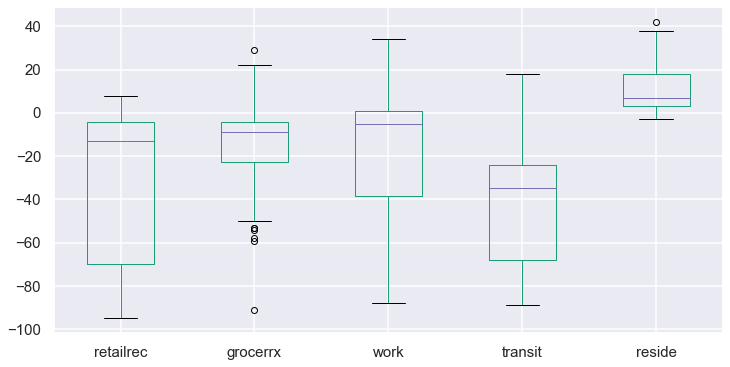

In [131]:
#Per discussion with the Professor decision was made to retain the outliers of the raw data
# and forego the smoothing or averaging of the data
#dfnz.boxplot(column=['casesdelta','deathsdelta','retailrec','grocerrx','transit','work','parks','reside'], figsize=(12,6), fontsize=15)
dfnz.boxplot(column=['retailrec','grocerrx','work','transit','reside'], figsize=(12,6), fontsize=15)

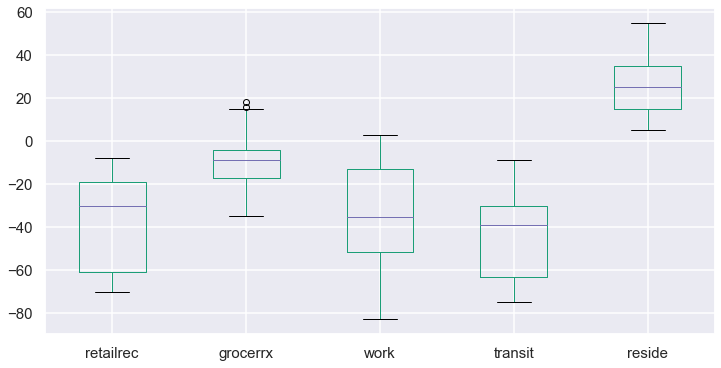

In [132]:
dfsi.boxplot(column=['retailrec','grocerrx','work','transit','reside'], figsize=(12,6), fontsize=15)

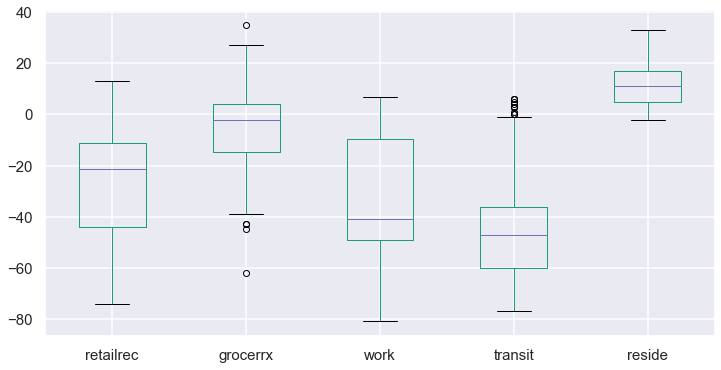

In [133]:
dfca.boxplot(column=['retailrec','grocerrx','work','transit','reside'], figsize=(12,6), fontsize=15)

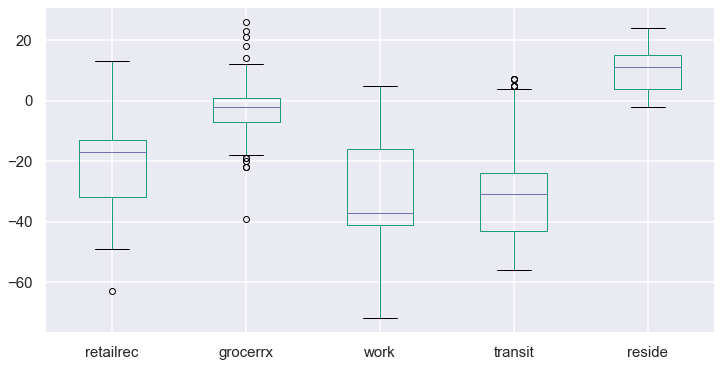

In [134]:
dfus.boxplot(column=['retailrec','grocerrx','work','transit','reside'], figsize=(12,6), fontsize=15)

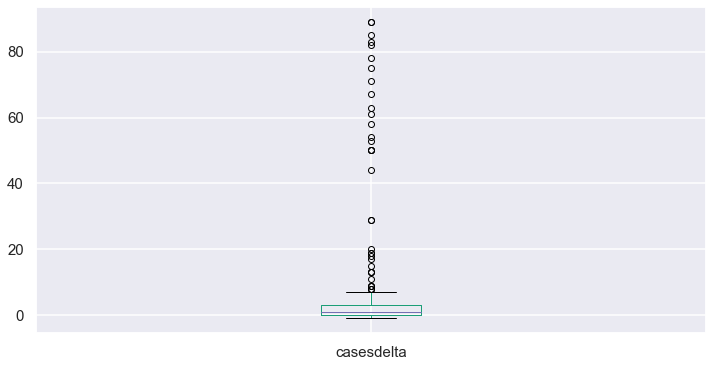

In [135]:
dfnz.boxplot(column=['casesdelta'], figsize=(12,6), fontsize=15)

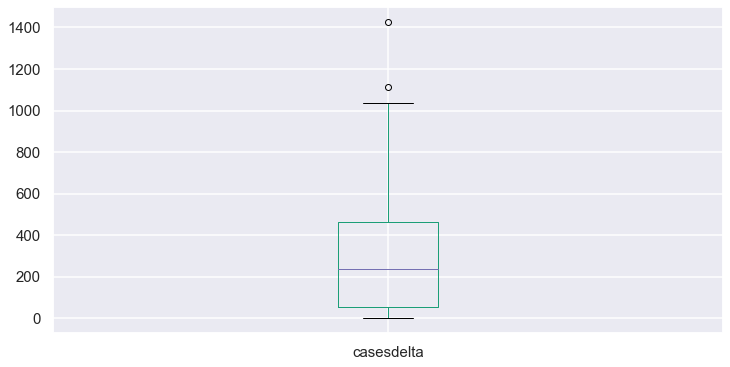

In [136]:
dfsi.boxplot(column=['casesdelta'], figsize=(12,6), fontsize=15)

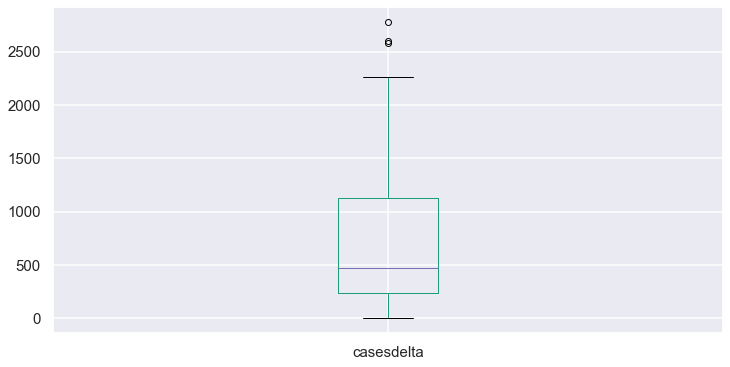

In [139]:
dfca.boxplot(column=['casesdelta'], figsize=(12,6), fontsize=15)

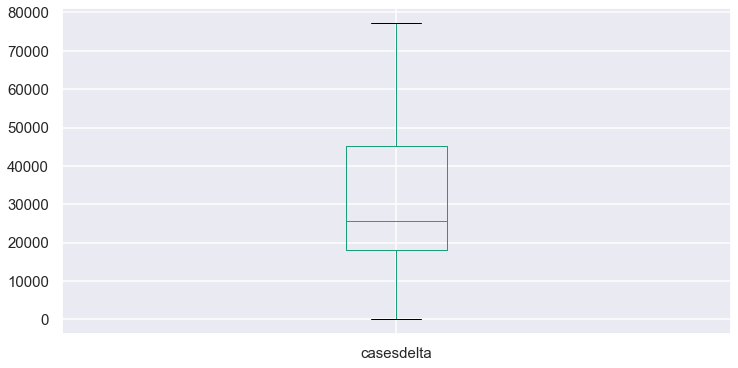

In [138]:
dfus.boxplot(column=['casesdelta'], figsize=(12,6), fontsize=15)

In [143]:
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
#To better show these variables in future plots, we can transform these columns by taking the logarithm of the values:    
# Take the log of